# 0) Import Packages

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt
from matplotlib.widgets import Slider
from IPython.html.widgets import interact, fixed 
from ipywidgets import interact, fixed
import ipywidgets as widgets
import ipywidgets as widgets
import os
import io 
import pandas as pd
import sys
import glob #glob is helpful for searching for filenames or directories
#import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
#import tiff_file
import scipy #scientific python
from scipy.special import gamma
import pickle #for saving data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "

In [2]:
import numpy as np
from nptdms import TdmsFile
from nptdms import tdms
from nptdms import TdmsFile
from collections import defaultdict
from nptdms import scaling, types
from nptdms.utils import Timer, OrderedDict, cached_property
from nptdms.log import log_manager
from nptdms.common import ObjectPath
from nptdms.reader import TdmsReader
from nptdms.channel_data import get_data_receiver, slice_raw_data
from nptdms.export import hdf_export, pandas_export
from nptdms.base_segment import RawChannelDataChunk
from nptdms.timestamp import TdmsTimestamp, TimestampArray

In [3]:
folder = '7-27-21 3chamber Kai'
exp='W:\\Gregor L\\OT data\\'+folder+'\\nonlinear'
new_saveto= 'W:\\Gregor L\\summer 2021\\OT data figures\\'+folder+'\\'

In [4]:
Maxtrials = 10
aqrate = 20000
exp_time= 50
Trap_Stiffness=45
distance = 10

#* plotting parameters    
font_plt = {'family': 'serif',
         'color':  'darkred',
         'weight': 'normal',
         'size': 9,
         }
font_plt_ax = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 10,
            }

In [28]:
pre = 4
post = 8

DataLength = aqrate*exp_time
pre_data = aqrate*pre
post_data = aqrate*post
Time = np.linspace(0,exp_time, DataLength)

Stg_X = np.zeros(DataLength)
Stg_Y = np.zeros(DataLength)

PSD_X = np.zeros(DataLength)
PSD_Y = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials

Force_X = np.zeros(DataLength)
all_force_x = np.zeros(Maxtrials)
Force_Y = np.zeros(DataLength)
errorforce = np.zeros(DataLength)
sum_force_x = (np.zeros(DataLength))*Maxtrials
sum_errorforce = (np.zeros(DataLength))*Maxtrials

<IPython.core.display.Javascript object>


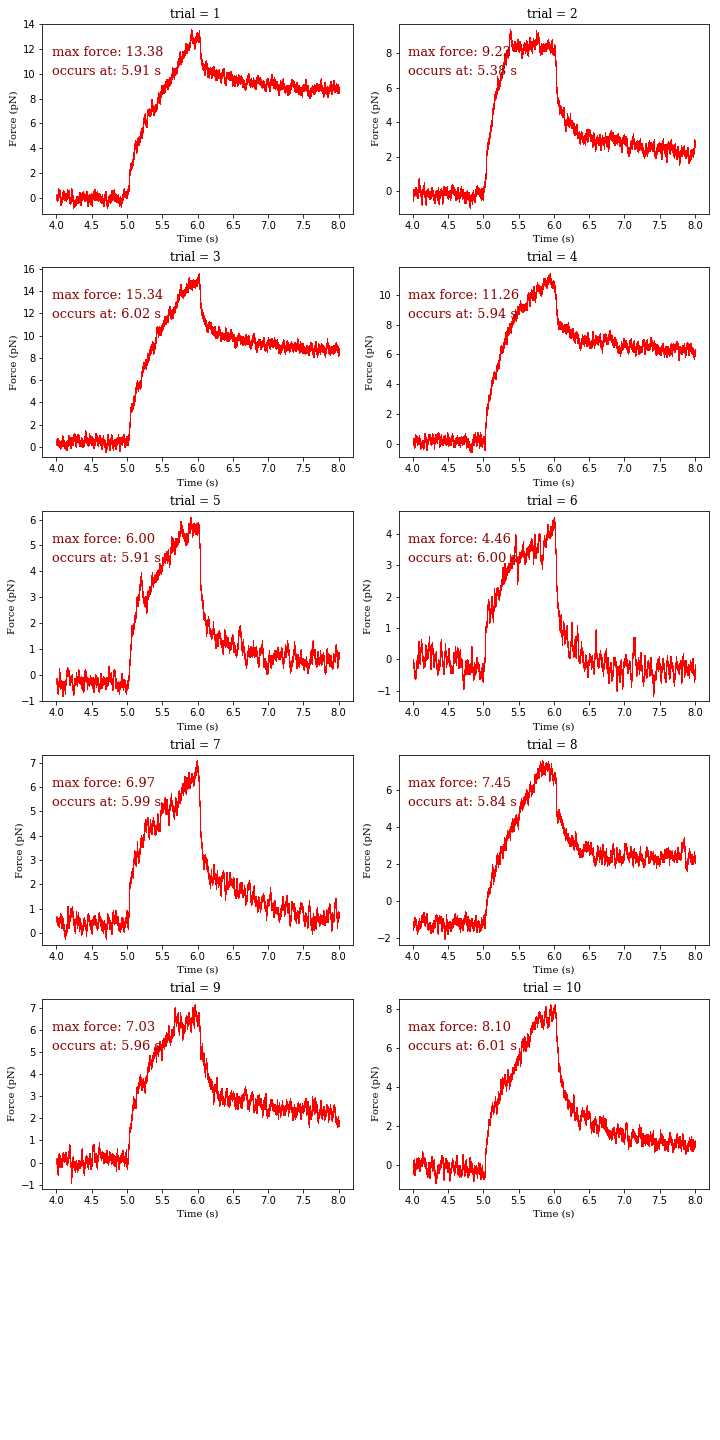

[5.910405910405911, 5.382255382255383, 6.016256016256016, 5.944205944205945, 5.905705905705906, 6.002806002806003, 5.987705987705988, 5.836505836505837, 5.958705958705959, 6.013906013906014]
9.912490631721084


In [29]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax = 0
all_xmax = [0] * Maxtrials
for i in range(1,11):
    #if i == 2:
        #i = 3
    trial = '\\Trial_'+str(i+50)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    all_xmax[i-1] = xmax
    ymax = pltforce_x.max()
    all_ymax = all_ymax + ymax
    xmin = pltTime[np.argmin(pltforce_x)]
    ymin = pltforce_x.min()
    ax.text(0.03,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
    
print(all_xmax)
avg_ymax = all_ymax/9
print(avg_ymax)

In [30]:
filename= 'EA_trials_initial_force'  
plt.savefig(new_saveto+'trials\\'+filename+'.png')

<IPython.core.display.Javascript object>


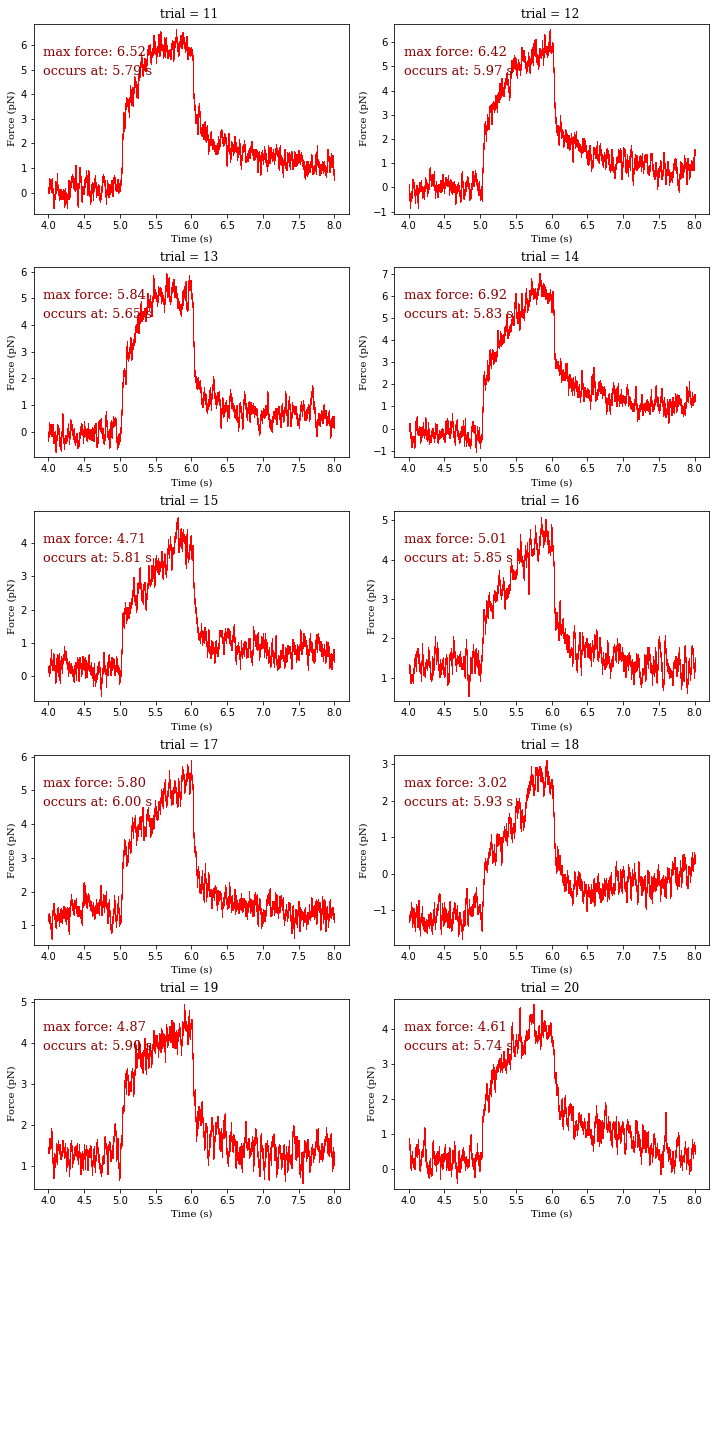

[5.786805786805787, 5.971605971605972, 5.651305651305651, 5.830905830905831, 5.8091558091558095, 5.84975584975585, 5.996155996155997, 5.926855926855927, 5.9006559006559005, 5.744755744755745]
5.372250415757259


In [31]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax2 = 0
all_xmax2 = [0] * Maxtrials
for i in range(1,11):
    trial = '\\Trial_'+str(i+40)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    all_xmax2[i-1] = xmax
    ymax = pltforce_x.max()
    all_ymax2 = all_ymax2 + ymax
    ax.text(0.03,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i+10)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
print(all_xmax2)    
avg_ymax2 = all_ymax2/10
print(avg_ymax2)

In [32]:
filename= 'no_kaiC_trials_initial_force'  
plt.savefig(new_saveto+'trials\\'+filename+'.png')

<IPython.core.display.Javascript object>


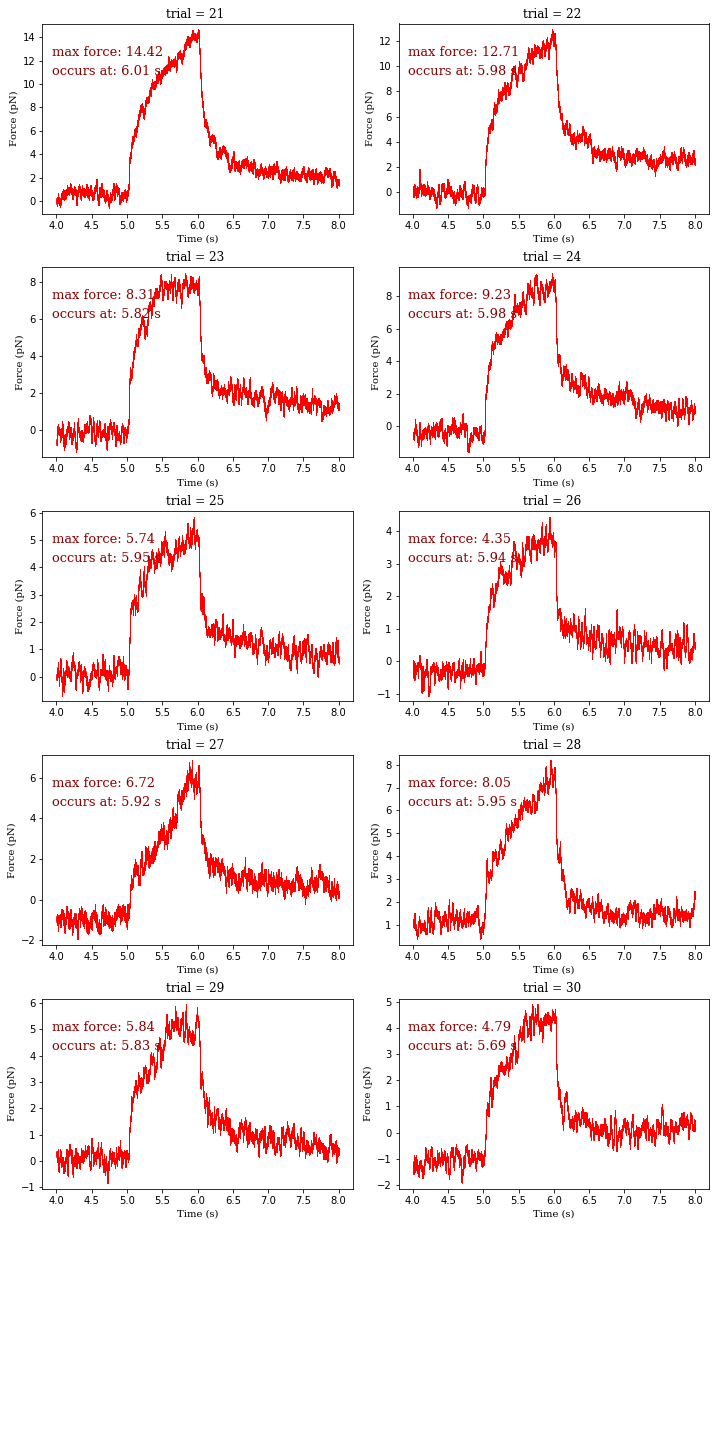

[6.0101560101560105, 5.978055978055978, 5.823655823655824, 5.975205975205975, 5.945905945905946, 5.94000594000594, 5.91980591980592, 5.9529559529559535, 5.8332558332558335, 5.694805694805695]
8.017741540676544


In [33]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax3 = 0
all_xmax3 = [0] * Maxtrials
for i in range(1,11):
    trial = '\\Trial_'+str(i+30)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    all_xmax3[i-1] = xmax
    ymax = pltforce_x.max()
    all_ymax3 = all_ymax3 + ymax
    ax.text(0.03,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i+20)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
print(all_xmax3)    
avg_ymax3 = all_ymax3/10
print(avg_ymax3)

In [34]:
filename= 'AE_trials_initial_force'  
plt.savefig(new_saveto+'trials\\'+filename+'.png')

In [35]:
a_stg_x = np.zeros(DataLength)
all_mstart = [0] * 31

font_plt = {'family': 'serif',
         'color':  'darkred',
         'weight': 'normal',
         'size': 13,}
font_plt1 = {'family': 'serif',
         'color':  'blue',
         'weight': 'normal',
         'size': 13,}
font_plt2 = {'family': 'serif',
         'color':  'red',
         'weight': 'normal',
         'size': 13,}
font_plt3 = {'family': 'serif',
         'color':  'green',
         'weight': 'normal',
         'size': 13,}
font_plt_ax = {'family': 'serif',
         'color':  'black',
         'weight': 'normal',
         'size': 15,}

<IPython.core.display.Javascript object>


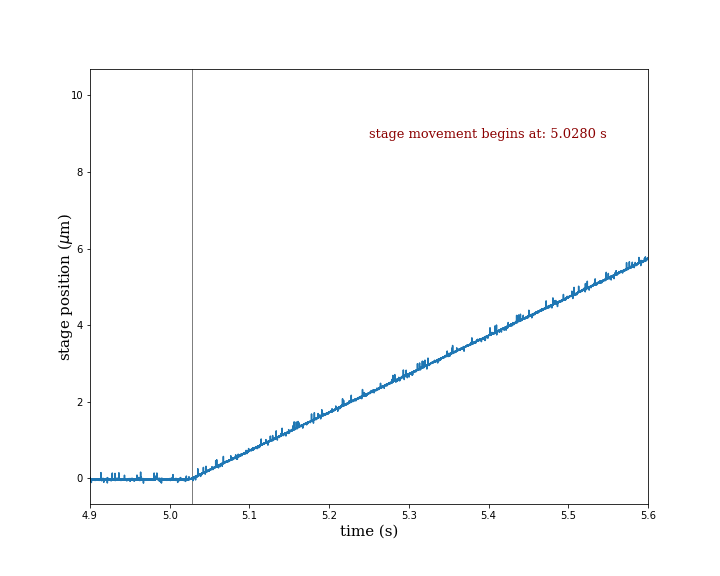

[0, 0, 0, 0, 5.028, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
trial_num = 5
zoom_i = 4.9
zoom_f = 5.6
mstart = 5.028

trial = '\\Trial_'+str(trial_num)+'.tdms'
tdms_file = TdmsFile.read(exp+trial)
group = tdms_file["Aquire_Robert"]
stg_x = group["Voltage_3"]
for i in range(len(stg_x)):
    a_stg_x[i] = (stg_x[i] *5.0979) +25.4895
    
%matplotlib notebook
all_mstart[trial_num-1] = mstart
fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.axvline(x=mstart, color='black', linewidth='0.5')
ax.plot(Time, a_stg_x)
plt.xlim(zoom_i, zoom_f)
ax.set_ylabel("stage position ($\mu$m$^{}$)", fontdict=font_plt_ax, labelpad=-5)
ax.set_xlabel("time (s)", fontdict=font_plt_ax)
ax.text(0.5,0.85,'stage movement begins at: %.4f s' % mstart, fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
print(all_mstart)

In [18]:
start_t = 5.028
end_t = 6.01

PSD_X = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
start = int(aqrate*start_t)
end = int(aqrate*end_t)
cut = DataLength-end

sum_PSDx = (np.zeros(DataLength))*Maxtrials
force_x = np.zeros(int(DataLength-start-cut))
sum_force_x = (np.zeros(int(DataLength-start-cut)))*Maxtrials

Time = np.linspace(0,exp_time, DataLength)
t_data = Time[start:end]

In [37]:
PSD_X = 0
force_X = 0 
sum_force_x = 0
force_data = [0]*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i+50)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    force_data[i-1] = force_x
    sum_force_x = sum_force_x + force_x
    
avg_PSDx_EA = (sum_PSDx/Maxtrials)
avg_force_x_EA = (sum_force_x/Maxtrials)

trial_1 = force_data[0]
trial_2 = force_data[1]
trial_3 = force_data[2]
trial_4 = force_data[3]
trial_5 = force_data[4]
trial_6 = force_data[5]
trial_7 = force_data[6]
trial_8 = force_data[7]
trial_9 = force_data[8]
trial_10 = force_data[9]
#trial_11 = force_data[10]

EA_trials_force_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10]))
#EA_trials_force_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10,trial_11]))
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/EA_trials_force_data_.csv', EA_trials_force_data, delimiter=',')

In [38]:
PSD_X = 0
force_X = 0 
sum_force_x = 0
force_data = [0]*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i+40)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    force_data[i-1] = force_x
    sum_force_x = sum_force_x + force_x

avg_PSDx_noKC = (sum_PSDx/Maxtrials)
avg_force_x_noKC = (sum_force_x/Maxtrials)

trial_1 = force_data[0]
trial_2 = force_data[1]
trial_3 = force_data[2]
trial_4 = force_data[3]
trial_5 = force_data[4]
trial_6 = force_data[5]
trial_7 = force_data[6]
trial_8 = force_data[7]
trial_9 = force_data[8]
trial_10 = force_data[9]

no_kaiC_trials_force_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10]))
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/no_kaiC_trials_force_data_.csv', no_kaiC_trials_force_data, delimiter=',')

In [39]:
PSD_X = 0
force_X = 0 
sum_force_x = 0
force_data = [0]*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i+30)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    force_data[i-1] = force_x
    sum_force_x = sum_force_x + force_x

avg_PSDx_AE = (sum_PSDx/Maxtrials)
avg_force_x_AE = (sum_force_x/Maxtrials)

trial_1 = force_data[0]
trial_2 = force_data[1]
trial_3 = force_data[2]
trial_4 = force_data[3]
trial_5 = force_data[4]
trial_6 = force_data[5]
trial_7 = force_data[6]
trial_8 = force_data[7]
trial_9 = force_data[8]
trial_10 = force_data[9]

AE_trials_force_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10]))
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/AE_trials_force_data_.csv', AE_trials_force_data, delimiter=',')

<IPython.core.display.Javascript object>


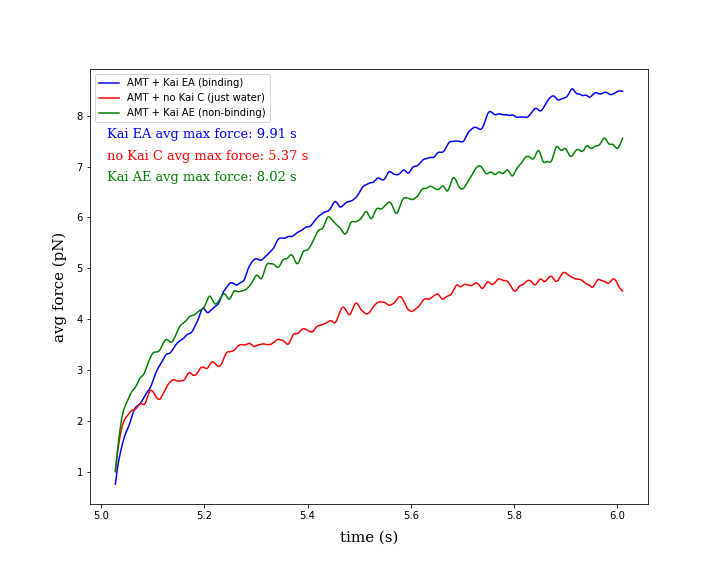

In [40]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.plot(Time[start:end], avg_force_x_EA, color='blue', label='AMT + Kai EA (binding)')
ax.plot(Time[start:end], avg_force_x_noKC, color='red', label='AMT + no Kai C (just water)')
ax.plot(Time[start:end], avg_force_x_AE, color='green', label='AMT + Kai AE (non-binding)')
ax.set_ylabel("avg force (pN)", fontdict=font_plt_ax, labelpad=10)
ax.set_xlabel("time (s)", fontdict=font_plt_ax, labelpad=10)
ax.text(0.03,0.85,'Kai EA avg max force: %.2f s' % avg_ymax,
            fontdict=font_plt1,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.03,0.80,'no Kai C avg max force: %.2f s' % avg_ymax2,
            fontdict=font_plt2,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.03,0.75,'Kai AE avg max force: %.2f s' % avg_ymax3,
            fontdict=font_plt3,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
plt.legend()
plt.show()

t_data = Time[start:end]
EA_data = avg_force_x_EA
noKC_data = avg_force_x_noKC
AE_data = avg_force_x_AE

#* this "savetxt" saves the data to seperate csv files; use this data to make plots in origin
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/avg_force_comparison.csv', np.c_[t_data, EA_data, noKC_data, AE_data], delimiter=',')

In [41]:
filename= 'avg_force_comparison'  
plt.savefig(new_saveto+filename+'_7-14-21.png')

In [42]:
all_mstart2 = [0] * 31

<IPython.core.display.Javascript object>


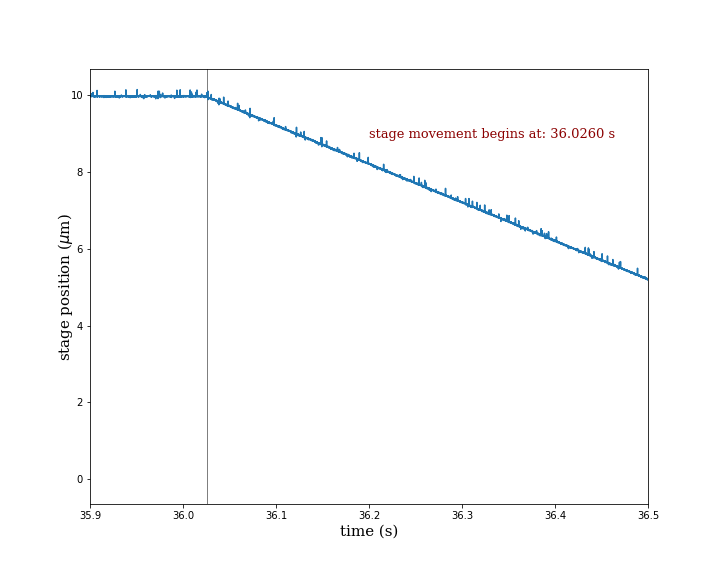

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36.026, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
trial_num = 22
zoom_i = 35.9
zoom_f = 36.5
mstart = 36.026

trial = '\\Trial_'+str(trial_num)+'.tdms'
tdms_file = TdmsFile.read(exp+trial)
group = tdms_file["Aquire_Robert"]
stg_x = group["Voltage_3"]
for i in range(len(stg_x)):
    a_stg_x[i] = (stg_x[i] *5.0979) +25.4895
    
%matplotlib notebook
all_mstart2[trial_num-1] = mstart
fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.axvline(x=mstart, color='black', linewidth='0.5')
ax.plot(Time, a_stg_x)
plt.xlim(zoom_i, zoom_f)
ax.set_ylabel("stage position ($\mu$m$^{}$)", fontdict=font_plt_ax, labelpad=-5)
ax.set_xlabel("time (s)", fontdict=font_plt_ax)
ax.text(0.5,0.85,'stage movement begins at: %.4f s' % mstart, fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
print(all_mstart2)

In [46]:
pre = 5.9
post = 36.026

DataLength = aqrate*exp_time
pre_data = int(aqrate*pre)
post_data = int(aqrate*post)
Time = np.linspace(0,exp_time, DataLength)

Stg_X = np.zeros(DataLength)
Stg_Y = np.zeros(DataLength)

PSD_X = np.zeros(DataLength)
PSD_Y = np.zeros(DataLength)
#PSD_strain = np.zeros(len(Time[pre_data:post_data]))
sum_PSDx = (np.zeros(DataLength))*Maxtrials

Force_X = np.zeros(DataLength)
all_force_x = np.zeros(Maxtrials)
Force_Y = np.zeros(DataLength)
errorforce = np.zeros(DataLength)
sum_force_x = (np.zeros(DataLength))*Maxtrials
sum_errorforce = (np.zeros(DataLength))*Maxtrials


#* plotting parameters    
font_plt = {'family': 'serif',
         'color':  'darkred',
         'weight': 'normal',
         'size': 9,
         }
font_plt_ax = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 10,
            }

<IPython.core.display.Javascript object>


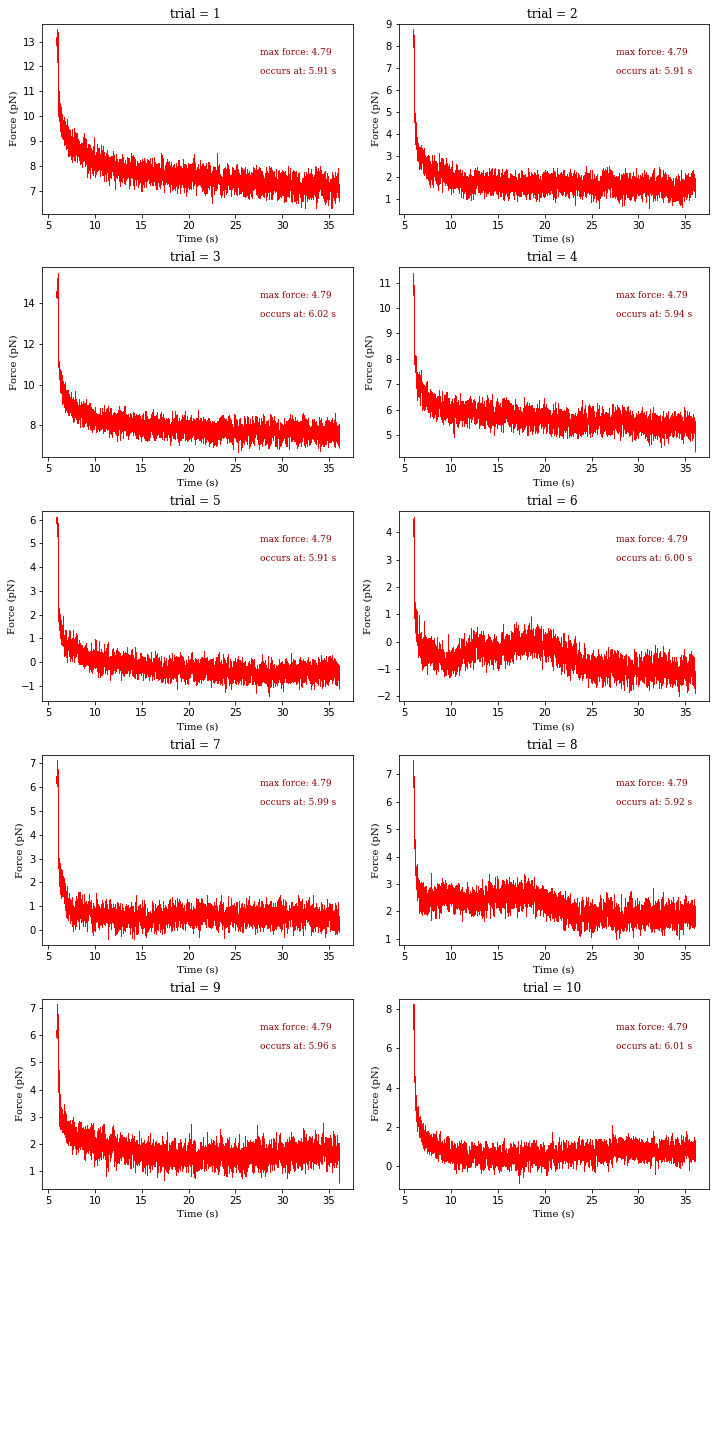

[5.910405910405911, 5.382255382255383, 6.016256016256016, 5.944205944205945, 5.905705905705906, 6.002806002806003, 5.987705987705988, 5.836505836505837, 5.958705958705959, 6.013906013906014]
9.912490631721084


In [47]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax = 0
#all_xmax = [0] * Maxtrials
for i in range(1,11):
    trial = '\\Trial_'+str(i+50)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data] 
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    #all_xmax[i-1] = xmax
    #ymax = pltforce_x.max()
    #all_ymax = all_ymax + ymax
    xmin = pltTime[np.argmin(pltforce_x)]
    ymin = pltforce_x.min()
    ax.text(0.7,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.7,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
print(all_xmax)
#avg_ymax = all_ymax/11
print(avg_ymax)

In [48]:
filename= 'EA_trials_relaxation'  
plt.savefig(new_saveto+'trials\\'+filename+'.png')

<IPython.core.display.Javascript object>


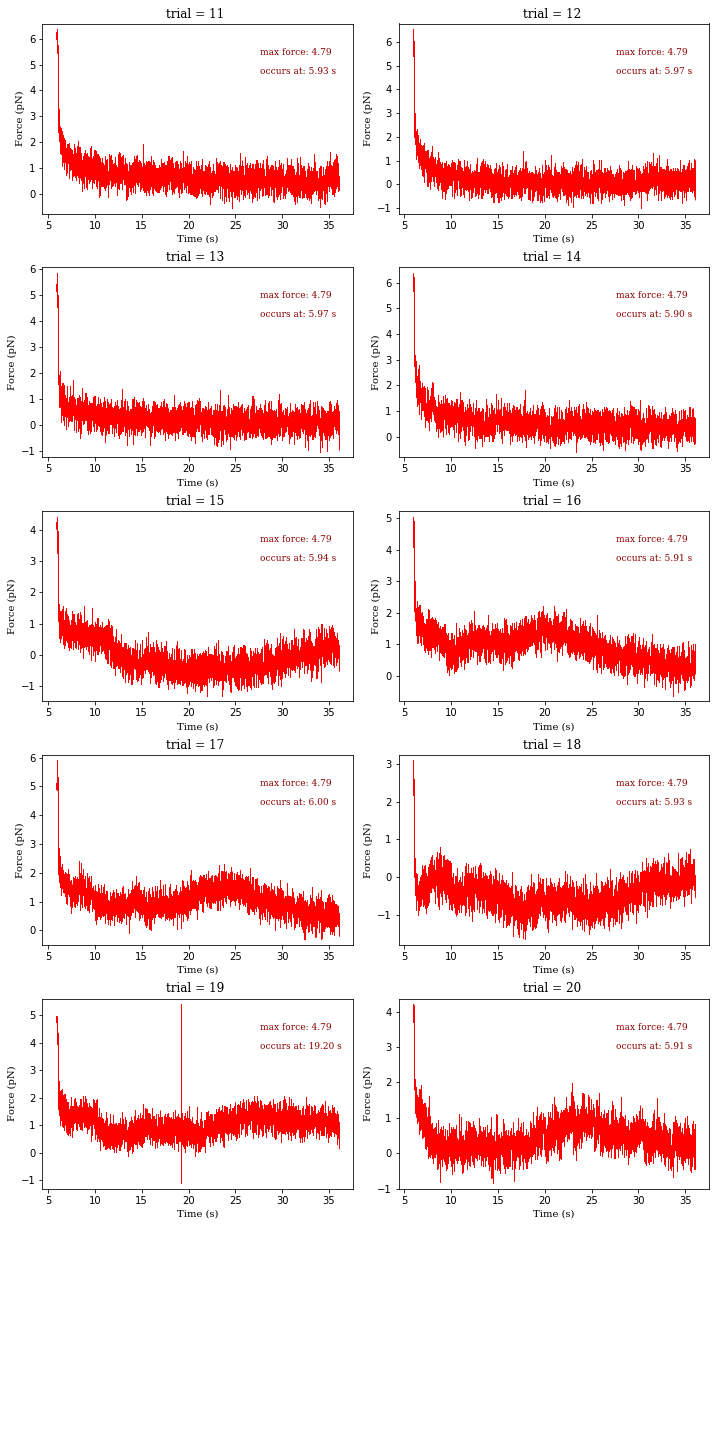

5.372250415757259


In [49]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax2 = 0
#all_xmax2 = [0] * Maxtrials
for i in range(1,11):
    trial = '\\Trial_'+str(i+40)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = (Time[pre_data:post_data]) 
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    #all_xmax2[i-1] = xmax
    #ymax = pltforce_x.max()
    #all_ymax2 = all_ymax2 + ymax
    ax.text(0.7,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.7,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i+10)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
#print(all_xmax2)    
#avg_ymax2 = all_ymax2/10
print(avg_ymax2)

In [50]:
filename= 'no_kaiC_trials_relaxation'  
plt.savefig(new_saveto+'trials\\'+filename+'.png')

<IPython.core.display.Javascript object>


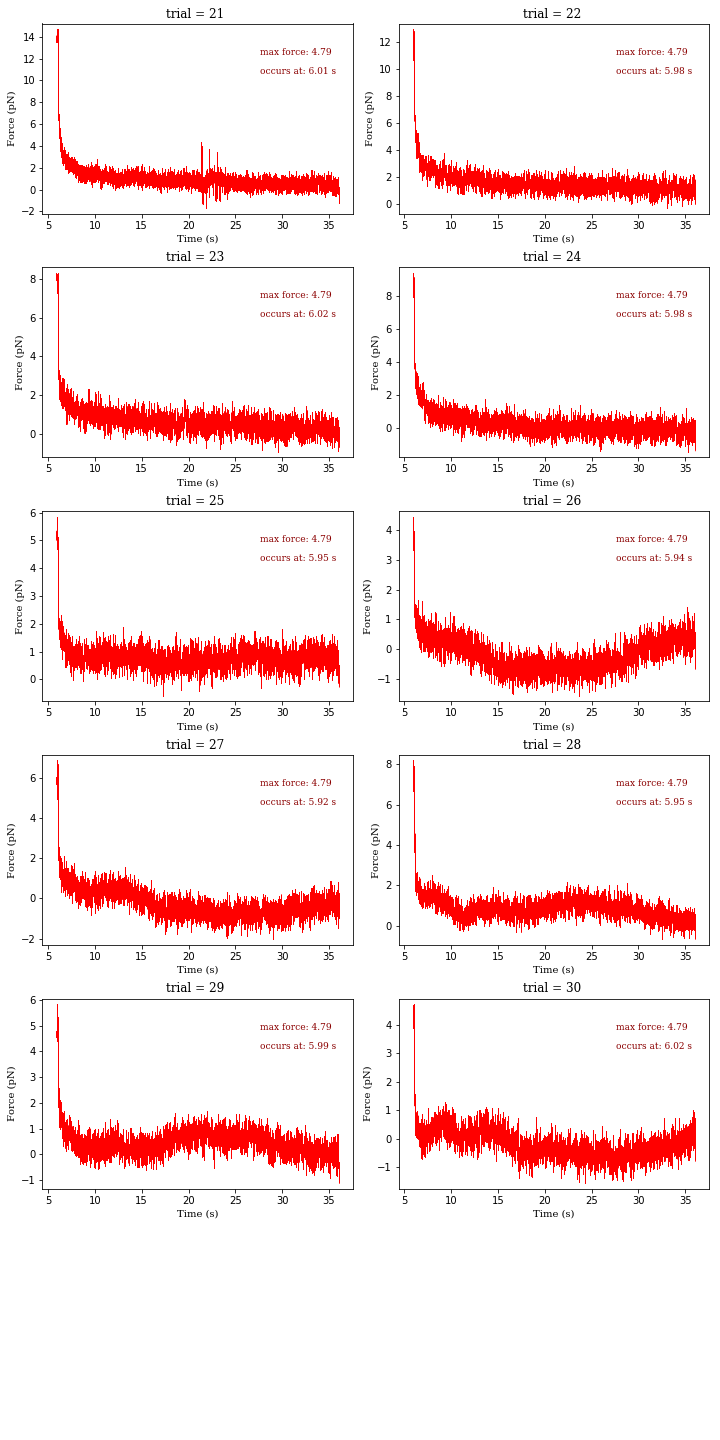

[6.0101560101560105, 5.978055978055978, 5.823655823655824, 5.975205975205975, 5.945905945905946, 5.94000594000594, 5.91980591980592, 5.9529559529559535, 5.8332558332558335, 5.694805694805695]
8.017741540676544


In [51]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax3 = 0
#all_xmax3 = [0] * Maxtrials
for i in range(1,11):
    trial = '\\Trial_'+str(i+30)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    #all_xmax3[i-1] = xmax
    #ymax = pltforce_x.max()
    #all_ymax3 = all_ymax3 + ymax
    ax.text(0.7,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.7,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i+20)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
    
print(all_xmax3)
#avg_ymax3 = all_ymax3/10
print(avg_ymax3)

In [52]:
filename= 'AE_trials_relaxation'  
plt.savefig(new_saveto+'trials\\'+filename+'.png')

In [63]:
start_t = 6.02
end_t = 35.0

In [64]:
PSD_X = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
start = int(aqrate*start_t)
end = int(aqrate*end_t)
cut = DataLength-end

sum_PSDx = (np.zeros(DataLength))*Maxtrials
force_x = np.zeros(int(DataLength-start-cut))
sum_force_x = (np.zeros(int(DataLength-start-cut)))*Maxtrials

Time = np.linspace(0,exp_time, DataLength)
t_data = Time[start:end]

In [65]:
PSD_X = 0
force_X = 0 
sum_force_x = 0
force_data = [0]*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i+50)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    force_data[i-1] = force_x
    sum_force_x = sum_force_x + force_x
    
avg_PSDx_EA = (sum_PSDx/Maxtrials)
avg_force_x_EA = (sum_force_x/Maxtrials)

trial_1 = force_data[0]
trial_2 = force_data[1]
trial_3 = force_data[2]
trial_4 = force_data[3]
trial_5 = force_data[4]
trial_6 = force_data[5]
trial_7 = force_data[6]
trial_8 = force_data[7]
trial_9 = force_data[8]
trial_10 = force_data[9]
#trial_11 = force_data[10]

EA_trials_relax_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10]))
#EA_trials_relax_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10,trial_11]))
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/EA_trials_relax_data.csv', EA_trials_relax_data, delimiter=',')

In [66]:
PSD_X = 0
force_X = 0 
sum_force_x = 0
force_data = [0]*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i+40)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    force_data[i-1] = force_x
    sum_force_x = sum_force_x + force_x

avg_PSDx_noKC = (sum_PSDx/Maxtrials)
avg_force_x_noKC = (sum_force_x/Maxtrials)

trial_1 = force_data[0]
trial_2 = force_data[1]
trial_3 = force_data[2]
trial_4 = force_data[3]
trial_5 = force_data[4]
trial_6 = force_data[5]
trial_7 = force_data[6]
trial_8 = force_data[7]
trial_9 = force_data[8]
trial_10 = force_data[9]

no_kaiC_trials_relax_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10]))
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/no_kaiC_trials_relax_data.csv', no_kaiC_trials_relax_data, delimiter=',')

In [67]:
PSD_X = 0
force_X = 0 
sum_force_x = 0
force_data = [0]*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i+30)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=100)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    force_data[i-1] = force_x
    sum_force_x = sum_force_x + force_x

avg_PSDx_AE = (sum_PSDx/Maxtrials)
avg_force_x_AE = (sum_force_x/Maxtrials)

trial_1 = force_data[0]
trial_2 = force_data[1]
trial_3 = force_data[2]
trial_4 = force_data[3]
trial_5 = force_data[4]
trial_6 = force_data[5]
trial_7 = force_data[6]
trial_8 = force_data[7]
trial_9 = force_data[8]
trial_10 = force_data[9]

AE_trials_relax_data=np.transpose(np.vstack([t_data,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10]))
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/AE_trials_relax_data.csv', AE_trials_relax_data, delimiter=',')

<IPython.core.display.Javascript object>


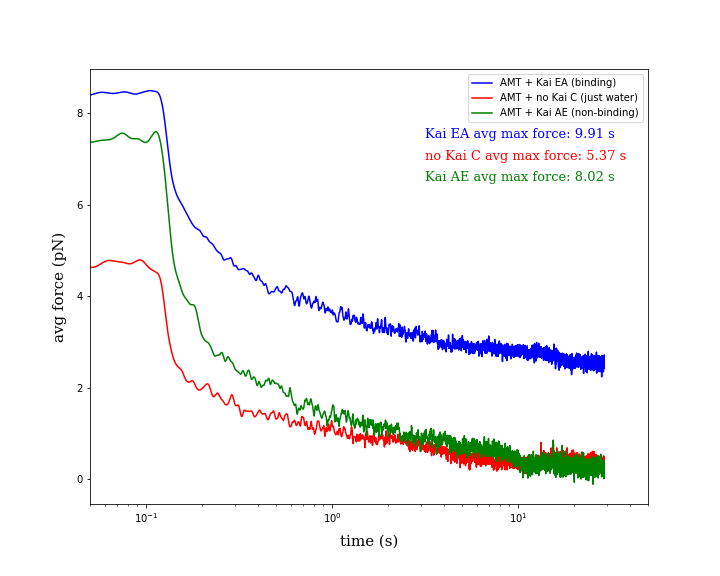

In [62]:
%matplotlib notebook
font_plt_ax = {'family': 'serif',
         'color':  'black',
         'weight': 'normal',
         'size': 15,}

fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.semilogx(Time[start:end]-start_t, avg_force_x_EA, color='blue', label='AMT + Kai EA (binding)')
ax.semilogx(Time[start:end]-start_t, avg_force_x_noKC, color='red', label='AMT + no Kai C (just water)')
ax.semilogx(Time[start:end]-start_t, avg_force_x_AE, color='green', label='AMT + Kai AE (non-binding)')
ax.set_xlim(0.05,50)
ax.set_ylabel("avg force (pN)", fontdict=font_plt_ax, labelpad=10)
ax.set_xlabel("time (s)", fontdict=font_plt_ax, labelpad=10)
ax.text(0.6,0.85,'Kai EA avg max force: %.2f s' % avg_ymax,
            fontdict=font_plt1,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.6,0.80,'no Kai C avg max force: %.2f s' % avg_ymax2,
            fontdict=font_plt2,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.6,0.75,'Kai AE avg max force: %.2f s' % avg_ymax3,
            fontdict=font_plt3,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
plt.legend()
plt.show()

t_data = Time[start:end]
EA_data = avg_force_x_EA
noKC_data = avg_force_x_noKC
AE_data = avg_force_x_AE

#* this "savetxt" saves the ISF data to seperate csv files; use this data to make plots in origin
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/avg_relaxation_comparison_semilog.csv', np.c_[t_data, EA_data, noKC_data, AE_data], delimiter=',')

In [59]:
filename= 'avg_relaxation_comparison_semilog'  
plt.savefig(new_saveto+filename+'_7-14-21.png')

<IPython.core.display.Javascript object>


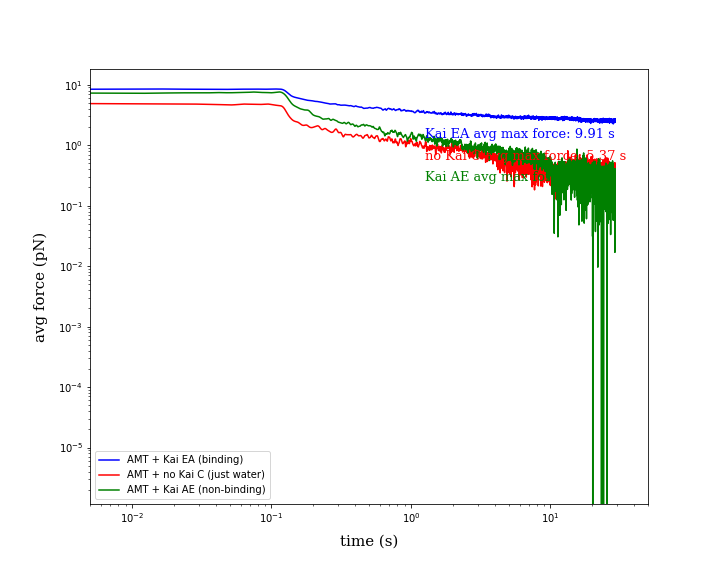

In [60]:
%matplotlib notebook
font_plt_ax = {'family': 'serif',
         'color':  'black',
         'weight': 'normal',
         'size': 15,}

fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.loglog(Time[start:end]-start_t, avg_force_x_EA, color='blue', label='AMT + Kai EA (binding)')
ax.loglog(Time[start:end]-start_t, avg_force_x_noKC, color='red', label='AMT + no Kai C (just water)')
ax.loglog(Time[start:end]-start_t, avg_force_x_AE, color='green', label='AMT + Kai AE (non-binding)')
ax.set_xlim(0.005,50)
ax.set_ylabel("avg force (pN)", fontdict=font_plt_ax, labelpad=10)
ax.set_xlabel("time (s)", fontdict=font_plt_ax, labelpad=10)
ax.text(0.6,0.85,'Kai EA avg max force: %.2f s' % avg_ymax,
            fontdict=font_plt1,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.6,0.80,'no Kai C avg max force: %.2f s' % avg_ymax2,
            fontdict=font_plt2,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.6,0.75,'Kai AE avg max force: %.2f s' % avg_ymax3,
            fontdict=font_plt3,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
plt.legend()
plt.show()

#* this "savetxt" saves the ISF data to seperate csv files; use this data to make plots in origin
#np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/avg_relaxation_comparison_loglog.csv', np.c_[t_data, EA_data, noKC_data, AE_data], delimiter=',')

In [61]:
filename= 'avg_relaxation_comparison_loglog'  
plt.savefig(new_saveto+filename+'_7-14-21.png')